Things remaining to do:  
- Implement time it to see how long it takes to train each model 

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

Evaluated the following parameters:  
1. SS vs MS architecture
2. 

Things remaining to do: 
- log training and validation scores for each model at each epoch (use 100)
- plot learning curves

---
# Admin

Load packages and set notebook parameters

In [1]:
import numpy as np
import pandas as pd
import cv2

import tensorflow as tf

In [2]:
from tensorflow.contrib.layers import flatten

In [3]:
from sklearn.utils import shuffle

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (16.0, 6.0)

---
# Load data

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [6]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

inputs_loc = '/media/fqaiser94/ff3daf1f-fc36-43a4-a218-478126941f2a/traffic-signs-data/'

training_file = inputs_loc + 'train.p'
validation_file= inputs_loc + 'valid.p'
testing_file = inputs_loc + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [7]:
X_train, y_train = shuffle(X_train, y_train)

In [47]:
signnames = pd.read_csv(filepath_or_buffer='/home/fqaiser94/CarND-Traffic-Sign-Classifier-Project/signnames.csv')

In [48]:
signnames.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [58]:
signnames.index.get_loc(0)

0

In [61]:
signnames.at[signnames[signnames.ClassId==0].index[0],'SignName']

'Speed limit (20km/h)'

---
# EDA

Results of basic exploratory data analysis.  

Imbalanced classes

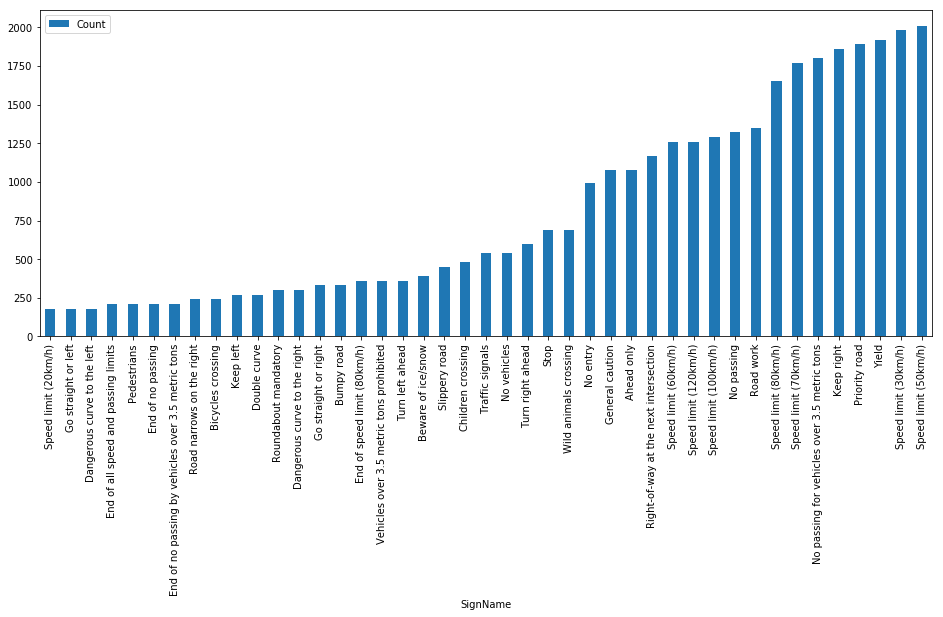

In [31]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)

df = pd.DataFrame({'ClassId':unique_elements, 
                   'Count':counts_elements
                  })

df = pd.merge(df, signnames, on=['ClassId'])

df = df.sort_values('Count')

df.plot('SignName', 'Count', kind='bar')

Sample class images

Class 0: Speed limit (20km/h)  180 samples


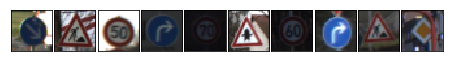

--------------------------------------------------------------------------------------

Class 1: Speed limit (30km/h)  1980 samples


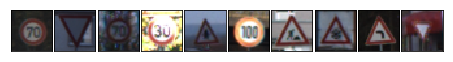

--------------------------------------------------------------------------------------

Class 2: Speed limit (50km/h)  2010 samples


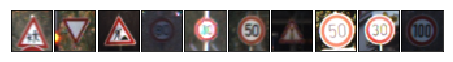

--------------------------------------------------------------------------------------

Class 3: Speed limit (60km/h)  1260 samples


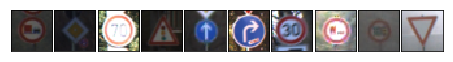

--------------------------------------------------------------------------------------

Class 4: Speed limit (70km/h)  1770 samples


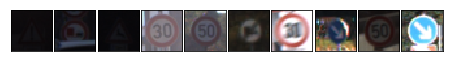

--------------------------------------------------------------------------------------

Class 5: Speed limit (80km/h)  1650 samples


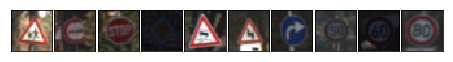

--------------------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)  360 samples


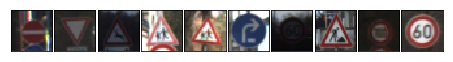

--------------------------------------------------------------------------------------

Class 7: Speed limit (100km/h)  1290 samples


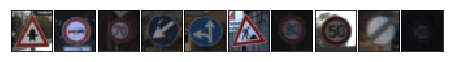

--------------------------------------------------------------------------------------

Class 8: Speed limit (120km/h)  1260 samples


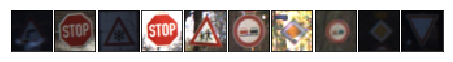

--------------------------------------------------------------------------------------

Class 9: No passing  1320 samples


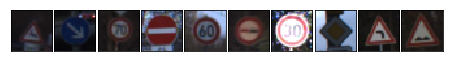

--------------------------------------------------------------------------------------

Class 10: No passing for vehicles over 3.5 metric tons  1800 samples


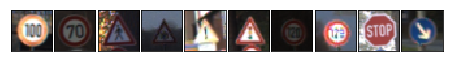

--------------------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection  1170 samples


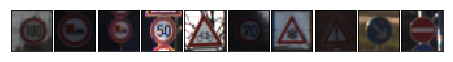

--------------------------------------------------------------------------------------

Class 12: Priority road  1890 samples


KeyboardInterrupt: 

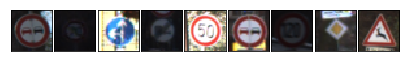

In [62]:
import random

col_width = max(len(name) for name in signnames)

sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    #print("Class %i: %s  %s samples" % (c, col_width, str(c_count)))
    print("Class %i: %-*s  %s samples" % (c, 
                                          col_width, 
                                          signnames.at[signnames[signnames.ClassId==c].index[0],'SignName'], 
                                          str(c_count)
                                         ))
    fig = plt.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    plt.show()
    print("--------------------------------------------------------------------------------------\n")

---
# Define functions

Define some useful function.  

In [14]:
def random_image(array, index=None): 
    
    if index==None: 
        
        max_index = len(array)
        index = np.random.randint(low=0,high=max_index)
    
    img = array[index].squeeze()
    
    plt.imshow(img)

In [15]:
def calc_filter_length(old_length, new_length, padding, stride): 

    # OG formula
    # new_width = (old_width - filter_width + 2*padding)/stride + 1
    # rewrite to solve for filter_width
    filter_length = -1*(stride*(new_length-1) - 2*padding - old_length)    
    
    return filter_length

In [16]:
# test function 

filter_length = calc_filter_length(old_length = 32, 
                                  new_length = 28, 
                                  padding = 0, 
                                  stride = 1
                                 )
assert filter_length==5, "Houston we've got a problem"

----
# Model 1: LeNet

Build a baseline model based on the original LeNet architecture.  

![LeNet Architecture](http://eblearn.sourceforge.net/lib/exe/lenet5.png)
Source: Yan LeCun

## Step 1: Prep Data

In [422]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed. 

def normalize(data):
    
    data_normalized = (data - 128) / 128
    
    return data_normalized

In [423]:
def rgb2gray(rgb):
    
    x = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    
    #x = np.reshape(x, x.shape + (1,))
    
    x = x.reshape(x.shape + (1,)) 

        
    return x 

In [424]:
X_train.shape

(34799, 32, 32, 3)

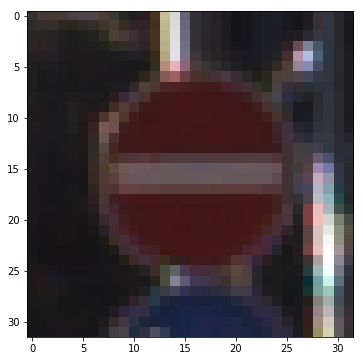

In [425]:
random_image(array=X_train, index=1000)

In [426]:
print('old mean: %s' %np.mean(X_train))
print('old std:  %s' %np.std(X_train))

old mean: 82.677589037
old std:  67.8508884263


In [427]:
def preprocess(x): 
    
    x = normalize(x)
    x = rgb2gray(x)
    
    return x

In [428]:
X_train_processed = preprocess(X_train)
X_valid_processed = preprocess(X_valid)
X_test_processed  = preprocess(X_test)

In [429]:
X_train_processed.shape

(34799, 32, 32, 1)

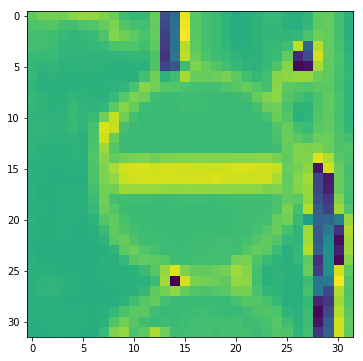

In [430]:
random_image(array=X_train_processed, index=1000)

In [431]:
print('new mean: %s' %np.mean(X_train_processed))
print('new std:  %s' %np.std(X_train_processed))

new mean: 1.22069521794
new std:  0.392135235831


## Step 2: Design and Test a Model Architecture

define training pipeline/architecture. 

In [432]:
def cnn(x):
    
    # vanilla LeNet implementation
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Step 3: Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [433]:
EPOCHS = 10
BATCH_SIZE = 128

In [434]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [435]:
rate = 0.001

logits = cnn(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [436]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [462]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_processed)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_processed, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.747
Test Accuracy = 0.749

EPOCH 2 ...
Validation Accuracy = 0.824
Test Accuracy = 0.840

EPOCH 3 ...
Validation Accuracy = 0.868
Test Accuracy = 0.867

EPOCH 4 ...
Validation Accuracy = 0.893
Test Accuracy = 0.884

EPOCH 5 ...
Validation Accuracy = 0.893
Test Accuracy = 0.892

EPOCH 6 ...
Validation Accuracy = 0.899
Test Accuracy = 0.901

EPOCH 7 ...
Validation Accuracy = 0.909
Test Accuracy = 0.902

EPOCH 8 ...
Validation Accuracy = 0.902
Test Accuracy = 0.902

EPOCH 9 ...
Validation Accuracy = 0.910
Test Accuracy = 0.912

EPOCH 10 ...
Validation Accuracy = 0.922
Test Accuracy = 0.905

Model saved


76% accuracy with the vanilla LeNet implementation. Pretty terrible but not as bad as perhaps we might have expected. Let's see if we can improve on that in our next model.  

----
# Model 2

Attempt to build architecture similar to [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf).  

We will use only the y channel, (research papers show color doesn't typically help).  
We'll also trying using a multi stage (MS) architecture.  

## Step 1: Prep Data

In [329]:
def rgb2y(array):
    
    array_y = np.empty((len(array), 32, 32, 1))
    
    for i in range(len(array)):
    
        img_yuv = cv2.cvtColor(np.array(array[i], dtype=np.uint8), cv2.COLOR_BGR2YUV, 1)
        y, u, v = cv2.split(img_yuv)
        
        y_reshaped = np.reshape(y, y.shape + (1,))

        array_y[i] = y_reshaped
        
    return array_y

In [330]:
def global_contrast_normalization(array, s=1, lmda=10, epsilon=0.000000001):    
    
    # https://datascience.stackexchange.com/questions/15110/how-to-implement-global-contrast-normalization-in-python

    array_y = np.empty((len(array), 32, 32, 1))
    
    for i in range(len(array)):
    
        X_average = np.mean(array[i])
    
        X = array[i] - X_average

        contrast = np.sqrt(lmda + np.mean(X**2))

        X = s * X / max(contrast, epsilon)

        array_y[i] = X
        
    return array_y

In [331]:
X_train.shape

(34799, 32, 32, 3)

In [332]:
print('old mean: %s' %np.mean(X_train))
print('old std:  %s' %np.std(X_train))

old mean: 82.677589037
old std:  67.8508884263


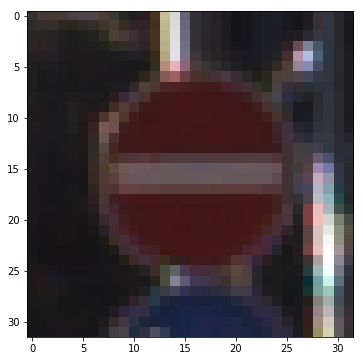

In [333]:
random_image(array=X_train, index=1000)

In [334]:
def preprocess(x): 
    
    x = rgb2y(x)
    x = global_contrast_normalization(x)
    
    return x

In [335]:
X_train_processed = preprocess(X_train)
X_valid_processed = preprocess(X_valid)
X_test_processed  = preprocess(X_test)

In [336]:
X_train_processed.shape

(34799, 32, 32, 1)

In [337]:
print('new mean: %s' %np.mean(X_train_processed))
print('new std:  %s' %np.std(X_train_processed))

new mean: -5.57943978415e-20
new std:  0.984310348751


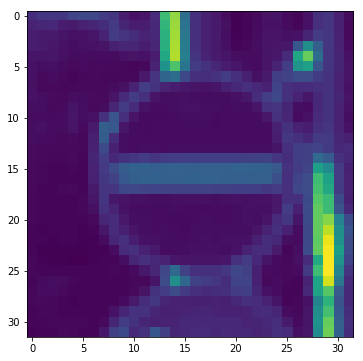

In [338]:
random_image(array=X_train_processed, index=1000)

## Step 2: Design and Test a Model Architecture

define training pipeline/architecture. 

In [339]:
# def cnn(x):
    
#     # Modelled after
#     # "Traffic Sign Recognition with Multi-Scale Convolutional Networks"
#     # By Pierre Sermanet and Yann LeCun
    
    
    
#     # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
#     mu = 0
#     sigma = 0.1
    
    
    
#     # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x108.
#     conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 108), mean = mu, stddev = sigma))
#     conv1_b = tf.Variable(tf.zeros(108))
#     conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

#     # SOLUTION: Activation.
#     conv1 = tf.nn.relu(conv1)

#     # SOLUTION: Pooling. Input = 28x28x108. Output = 14x14x108.
#     conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    
#     # SOLUTION: Layer 2: Convolutional. Input = 14x14x108. Output = 10x10x200.
#     conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 108, 200), mean = mu, stddev = sigma))
#     conv2_b = tf.Variable(tf.zeros(200))
#     conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
#     # SOLUTION: Activation.
#     conv2 = tf.nn.relu(conv2)

#     # SOLUTION: Pooling. Input = 10x10x200. Output = 5x5x200.
#     conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
#     # SOLUTION: Dropout
#     conv2 = tf.nn.dropout(conv2, 0.5)

    
    
#     # SOLUTION: Flatten. Input = 5x5x108. Output = 5000.
#     fc0   = flatten(conv2)
    
    
    
#     # SOLUTION: Layer 3: Fully Connected. Input = 5000. Output = 1000.
#     fc1_W = tf.Variable(tf.truncated_normal(shape=(5000, 1000), mean = mu, stddev = sigma))
#     fc1_b = tf.Variable(tf.zeros(1000))
#     fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
#     # SOLUTION: Activation.
#     fc1    = tf.nn.relu(fc1)
    
    

#     # SOLUTION: Layer 4: Fully Connected. Input = 1000. Output = 200.
#     fc2_W  = tf.Variable(tf.truncated_normal(shape=(1000, 200), mean = mu, stddev = sigma))
#     fc2_b  = tf.Variable(tf.zeros(200))
#     fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
#     # SOLUTION: Activation.
#     fc2    = tf.nn.relu(fc2)

    
    
#     # SOLUTION: Layer 5: Fully Connected. Input = 50. Output = 43.
#     fc3_W  = tf.Variable(tf.truncated_normal(shape=(200, 43), mean = mu, stddev = sigma))
#     fc3_b  = tf.Variable(tf.zeros(43))
#     logits = tf.matmul(fc2, fc3_W) + fc3_b
    
#     return logits

In [340]:
def cnn(x):
    
    # Modelled after
    # "Traffic Sign Recognition with Multi-Scale Convolutional Networks"
    # By Pierre Sermanet and Yann LeCun
    
    
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x108.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 108), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(108))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    act1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x108. Output = 14x14x108.
    pool1 = tf.nn.max_pool(act1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Dropout
    #drop1 = tf.nn.dropout(pool1, 0.5)

    
    
    # SOLUTION: Layer 2: Convolutional. Input = 14x14x108. Output = 10x10x200.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 108, 200), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(200))
    conv2   = tf.nn.conv2d(pool1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    act2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x200. Output = 5x5x200.
    pool2 = tf.nn.max_pool(act2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Dropout
    #drop2 = tf.nn.dropout(pool2, 0.5)

    
    
    # SOLUTION: Flatten. Input = 5x5x108. Output = 5000.
    
    # 1st stage output
    shape = pool1.get_shape().as_list()
    pool1 = tf.reshape(pool1, [-1, shape[1] * shape[2] * shape[3]])
    
    # 2nd stage output
    shape = pool2.get_shape().as_list()
    pool2 = tf.reshape(pool2, [-1, shape[1] * shape[2] * shape[3]])    
    
    fc0  = tf.concat(axis=1, values=[pool1, pool2])
    #fc0 = tf.concat(1, [pool1, pool2])
    #fc0 = flatten(drop2)
    
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = 26168. Output = 100.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(26168, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # SOLUTION: Dropout
    #fc1 = tf.nn.dropout(fc1, 0.5)

    
    

    # SOLUTION: Layer 4: Fully Connected. Input = 100. Output = 50.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
        
    # SOLUTION: Dropout
    #fc2 = tf.nn.dropout(fc2, 0.5)

    
    
    # SOLUTION: Layer 5: Fully Connected. Input = 50. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [341]:
EPOCHS = 10
BATCH_SIZE = 128

In [342]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [343]:
rate = 0.001

logits = cnn(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [344]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [345]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_processed)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_processed, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.840

EPOCH 2 ...
Validation Accuracy = 0.869

EPOCH 3 ...
Validation Accuracy = 0.903

EPOCH 4 ...
Validation Accuracy = 0.886

EPOCH 5 ...
Validation Accuracy = 0.926

EPOCH 6 ...
Validation Accuracy = 0.891

EPOCH 7 ...
Validation Accuracy = 0.917

EPOCH 8 ...
Validation Accuracy = 0.918

EPOCH 9 ...
Validation Accuracy = 0.929

EPOCH 10 ...
Validation Accuracy = 0.933

Model saved


93% accuracy, that's a big jump from Model 1.  
Human level performance is about 98%. Let's see if we can get closer still.  

----
# Model 3

Attempt to build architecture similar to [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf).  

We'll add some dropouts to our model.    

## Step 1: Prep Data

In [438]:
def rgb2y(array):
    
    array_y = np.empty((len(array), 32, 32, 1))
    
    for i in range(len(array)):
    
        img_yuv = cv2.cvtColor(np.array(array[i], dtype=np.uint8), cv2.COLOR_BGR2YUV, 1)
        y, u, v = cv2.split(img_yuv)
        
        y_reshaped = np.reshape(y, y.shape + (1,))

        array_y[i] = y_reshaped
        
    return array_y

In [439]:
def global_contrast_normalization(array, s=1, lmda=10, epsilon=0.000000001):    
    
    # https://datascience.stackexchange.com/questions/15110/how-to-implement-global-contrast-normalization-in-python

    array_y = np.empty((len(array), 32, 32, 1))
    
    for i in range(len(array)):
    
        X_average = np.mean(array[i])
    
        X = array[i] - X_average

        contrast = np.sqrt(lmda + np.mean(X**2))

        X = s * X / max(contrast, epsilon)

        array_y[i] = X
        
    return array_y

In [440]:
X_train.shape

(34799, 32, 32, 3)

In [441]:
print('old mean: %s' %np.mean(X_train))
print('old std:  %s' %np.std(X_train))

old mean: 82.677589037
old std:  67.8508884263


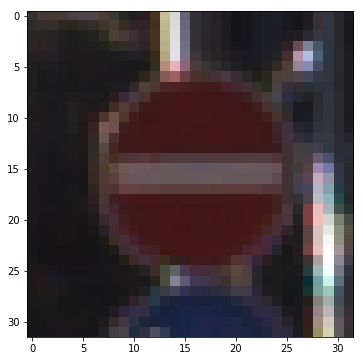

In [442]:
random_image(array=X_train, index=1000)

In [443]:
def preprocess(x): 
    
    x = rgb2y(x)
    x = global_contrast_normalization(x)
    
    return x

In [444]:
X_train_processed = preprocess(X_train)
X_valid_processed = preprocess(X_valid)
X_test_processed  = preprocess(X_test)

In [445]:
X_train_processed.shape

(34799, 32, 32, 1)

In [446]:
print('new mean: %s' %np.mean(X_train_processed))
print('new std:  %s' %np.std(X_train_processed))

new mean: -5.57943978415e-20
new std:  0.984310348751


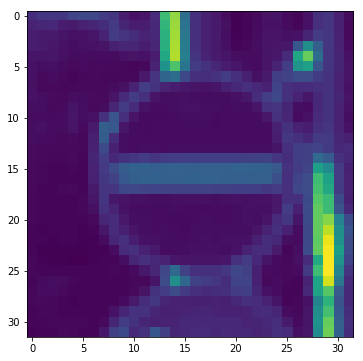

In [447]:
random_image(array=X_train_processed, index=1000)

## Step 2: Design and Test a Model Architecture

define training pipeline/architecture. 

In [448]:
from collections import namedtuple

Parameters = namedtuple(
    'Parameters', 
    [
        # Data parameters
        'num_classes', 
        'image_size', 
        
        # Layers architecture
        'conv1_k', 
        'conv1_d', 
        'conv1_p',
        
        'conv2_k', 
        'conv2_d', 
        'conv2_p', 
        
        #'conv3_k', 
        #'conv3_d', 
        #'conv3_p', 
        
        'fc1_size', 
        'fc1_p'
    ])

In [449]:
parameters = Parameters(
    # Data parameters
    num_classes = 43,
    image_size = (32, 32),
    
    # Layers architecture
    conv1_k = 5, 
    conv1_d = 32,
    conv1_p = 0.9,
    
    conv2_k = 5, 
    conv2_d = 64, 
    conv2_p = 0.8,
    
    #conv3_k = 5, 
    #conv3_d = 128, 
    #conv3_p = 0.7,
    
    fc1_size = 1000, 
    fc1_p = 0.5
)

In [450]:
def cnn(x, params, is_training=False):
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32.
    conv1_W = tf.Variable(
        tf.truncated_normal(
            shape=(params.conv1_k, params.conv1_k, 1, params.conv1_d), 
            mean = mu, 
            stddev = sigma
        )
    )
    
    conv1_b = tf.Variable(
        tf.zeros(params.conv1_d)
    )
    
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    act1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x32. Output = 14x14x32.
    pool1 = tf.nn.max_pool(act1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Dropout
    if is_training: 
        pool1 = tf.nn.dropout(pool1, params.conv1_p)

    
    
    # SOLUTION: Layer 2: Convolutional. Input = 14x14x32. Output = 10x10x64.
    conv2_W = tf.Variable(
        tf.truncated_normal(
            shape=(params.conv2_k, params.conv2_k, params.conv1_d, params.conv2_d), 
            mean = mu, 
            stddev = sigma
        )
    )
    
    conv2_b = tf.Variable(
        tf.zeros(params.conv2_d)
    )
    
    conv2 = tf.nn.conv2d(pool1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    act2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x64. Output = 5x5x64.
    pool2 = tf.nn.max_pool(act2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Dropout
    if is_training: 
        pool2 = tf.nn.dropout(pool2, params.conv2_p)
    
    
    
    # SOLUTION: Flatten.     
    # 1st stage output 14x14x32
    pool1 = tf.nn.max_pool(pool1, ksize=[1, 4, 4, 1], strides=[1, 4, 4, 1], padding='VALID')
    shape = pool1.get_shape().as_list()
    pool1 = tf.reshape(pool1, [-1, shape[1] * shape[2] * shape[3]])
    
    # 2nd stage output 5x5x64
    shape = pool2.get_shape().as_list()
    pool2 = tf.reshape(pool2, [-1, shape[1] * shape[2] * shape[3]])
    
    # flatten
    fc0  = tf.concat(axis=1, values=[pool1, pool2])
    
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1888. Output = 500.
    fc1_W = tf.Variable(
        tf.truncated_normal(
            shape=(1888, params.fc1_size), 
            mean = mu, 
            stddev = sigma
        )
    )
    
    fc1_b = tf.Variable(
        tf.zeros(params.fc1_size)
    )
    
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1 = tf.nn.relu(fc1)
    
    # SOLUTION: Dropout
    if is_training: 
        fc1 = tf.nn.dropout(fc1, 0.5)
      

    # SOLUTION: Layer 4: Fully Connected. Input = 500. Output = 43.
    fc2_W  = tf.Variable(
        tf.truncated_normal(
            shape=(params.fc1_size, params.num_classes), 
            mean = mu, 
            stddev = sigma
        )
    )
    
    fc2_b  = tf.Variable(
        tf.zeros(params.num_classes)
    )
    
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    
    return logits

In [451]:
EPOCHS = 10
BATCH_SIZE = 128

In [452]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [453]:
rate = 0.001

logits = cnn(x, params=parameters, is_training=True)
logits_no_dropout = cnn(x, params=parameters, is_training=False)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [454]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [455]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_processed)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_processed, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.729

EPOCH 2 ...
Validation Accuracy = 0.837

EPOCH 3 ...
Validation Accuracy = 0.852

EPOCH 4 ...
Validation Accuracy = 0.887

EPOCH 5 ...
Validation Accuracy = 0.895

EPOCH 6 ...
Validation Accuracy = 0.906

EPOCH 7 ...
Validation Accuracy = 0.914

EPOCH 8 ...
Validation Accuracy = 0.912

EPOCH 9 ...
Validation Accuracy = 0.910

EPOCH 10 ...
Validation Accuracy = 0.919

Model saved


93% accuracy. Perhaps we can do better still.  

----
# Model 4

We'll try using:   
- more layers, both in the feature generation and classification stages.  
- Decayed learning rate  

Things remaining to try:  
- More preprocessing  
- Regularization

## Step 1: Prep Data

In [346]:
def rgb2y(array):
    
    array_y = np.empty((len(array), 32, 32, 1))
    
    for i in range(len(array)):
    
        img_yuv = cv2.cvtColor(np.array(array[i], dtype=np.uint8), cv2.COLOR_BGR2YUV, 1)
        y, u, v = cv2.split(img_yuv)
        
        y_reshaped = np.reshape(y, y.shape + (1,))

        array_y[i] = y_reshaped
        
    return array_y

In [347]:
def global_contrast_normalization(array, s=1, lmda=10, epsilon=0.000000001):    
    
    # https://datascience.stackexchange.com/questions/15110/how-to-implement-global-contrast-normalization-in-python

    array_y = np.empty((len(array), 32, 32, 1))
    
    for i in range(len(array)):
    
        X_average = np.mean(array[i])
    
        X = array[i] - X_average

        contrast = np.sqrt(lmda + np.mean(X**2))

        X = s * X / max(contrast, epsilon)

        array_y[i] = X
        
    return array_y

In [348]:
X_train.shape

(34799, 32, 32, 3)

In [349]:
print('old mean: %s' %np.mean(X_train))
print('old std:  %s' %np.std(X_train))

old mean: 82.677589037
old std:  67.8508884263


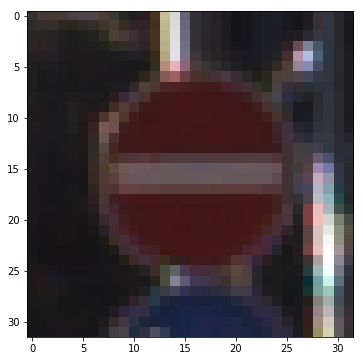

In [350]:
random_image(array=X_train, index=1000)

In [351]:
def preprocess(x): 
    
    x = rgb2y(x)
    x = global_contrast_normalization(x)
    
    return x

In [352]:
X_train_processed = preprocess(X_train)
X_valid_processed = preprocess(X_valid)
X_test_processed  = preprocess(X_test)

In [353]:
X_train_processed.shape

(34799, 32, 32, 1)

In [354]:
print('new mean: %s' %np.mean(X_train_processed))
print('new std:  %s' %np.std(X_train_processed))

new mean: -5.57943978415e-20
new std:  0.984310348751


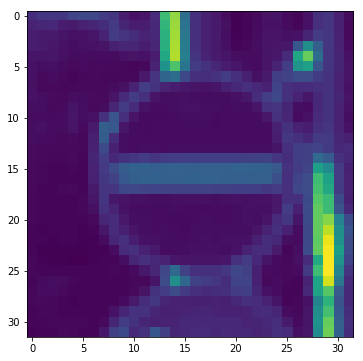

In [355]:
random_image(array=X_train_processed, index=1000)

## Step 2: Design and Test a Model Architecture

define training pipeline/architecture. 

In [382]:
from collections import namedtuple

Parameters = namedtuple(
    'Parameters', 
    [
        # Data parameters
        'num_classes', 
        'image_size', 
        
        # Layers architecture
        'conv1_k', 
        'conv1_d', 
        'conv1_p',
        
        'conv2_k', 
        'conv2_d', 
        'conv2_p', 
        
        'conv3_k', 
        'conv3_d', 
        'conv3_p', 
        
        'fc1_size', 
        'fc1_p', 
        
        'fc2_size', 
        'fc2_p'
    ])

In [383]:
parameters = Parameters(
    # Data parameters
    num_classes = 43,
    image_size = (32, 32),

    # Layers architecture
    conv1_k = 5, 
    conv1_d = 32,
    conv1_p = 0.9,
    
    conv2_k = 5, 
    conv2_d = 64, 
    conv2_p = 0.8,
    
    conv3_k = 5, 
    conv3_d = 128, 
    conv3_p = 0.7,
    
    fc1_size = 1000, 
    fc1_p = 0.5,
    
    fc2_size = 500, 
    fc2_p = 0.5
)

In [390]:
def cnn(x, params, is_training=False):
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32.
    conv1_W = tf.Variable(
        tf.truncated_normal(
            shape=(params.conv1_k, params.conv1_k, 1, params.conv1_d), 
            mean = mu, 
            stddev = sigma
        )
    )
    
    conv1_b = tf.Variable(
        tf.zeros(params.conv1_d)
    )
    
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # SOLUTION: Activation.
    act1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x32. Output = 14x14x32.
    pool1 = tf.nn.max_pool(act1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # SOLUTION: Dropout
    if is_training: 
        pool1 = tf.nn.dropout(pool1, params.conv1_p)

    
    
    # SOLUTION: Layer 2: Convolutional. Input = 14x14x32. Output = 10x10x64.
    conv2_W = tf.Variable(
        tf.truncated_normal(
            shape=(params.conv2_k, params.conv2_k, params.conv1_d, params.conv2_d), 
            mean = mu, 
            stddev = sigma
        )
    )
    
    conv2_b = tf.Variable(
        tf.zeros(params.conv2_d)
    )
    
    conv2 = tf.nn.conv2d(pool1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # SOLUTION: Activation.
    act2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x64. Output = 5x5x64.
    pool2 = tf.nn.max_pool(act2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # SOLUTION: Dropout
    if is_training: 
        pool2 = tf.nn.dropout(pool2, params.conv2_p)
    
    
    
    # SOLUTION: Layer 3: Convolutional. Input = 5x5x64. Output = 1x1x128.
    conv3_W = tf.Variable(
        tf.truncated_normal(
            shape=(params.conv3_k, params.conv3_k, params.conv2_d, params.conv3_d), 
            mean = mu, 
            stddev = sigma
        )
    )
    conv3_b = tf.Variable(
        tf.zeros(params.conv3_d)
    )
    conv3 = tf.nn.conv2d(pool2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    
    # SOLUTION: Activation.
    act3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling. Input = 1x1x128. Output = ??x??x128.
    pool3 = tf.nn.max_pool(act3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # SOLUTION: Dropout
    if is_training: 
        pool3 = tf.nn.dropout(pool3, params.conv3_p)

    
    
    # SOLUTION: Flatten.     
    # 1st stage output 14x14x32
    pool1 = tf.nn.max_pool(pool1, ksize=[1, 4, 4, 1], strides=[1, 4, 4, 1], padding='SAME')
    shape = pool1.get_shape().as_list()
    pool1 = tf.reshape(pool1, [-1, shape[1] * shape[2] * shape[3]])
    
    # 2nd stage output 5x5x64    
    pool2 = tf.nn.max_pool(pool2, ksize=[1, 4, 4, 1], strides=[1, 4, 4, 1], padding='SAME')
    shape = pool2.get_shape().as_list()
    pool2 = tf.reshape(pool2, [-1, shape[1] * shape[2] * shape[3]])
    
    # 3rd stage output 1x1x128
    shape = pool3.get_shape().as_list()
    pool3 = tf.reshape(pool3, [-1, shape[1] * shape[2] * shape[3]])
    
    # flatten
    fc0  = tf.concat(axis=1, values=[pool1, pool2, pool3])
    
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1888. Output = 1000.
    fc1_W = tf.Variable(
        tf.truncated_normal(
            shape=(2816, params.fc1_size), 
            mean = mu, 
            stddev = sigma
        )
    )
    
    fc1_b = tf.Variable(
        tf.zeros(params.fc1_size)
    )
    
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1 = tf.nn.relu(fc1)
    
    # SOLUTION: Dropout
    if is_training: 
        fc1 = tf.nn.dropout(fc1, params.fc1_p)
        
        
    
    # SOLUTION: Layer 4: Fully Connected. Input = 1000. Output = 500.
    fc2_W = tf.Variable(
        tf.truncated_normal(
            shape=(params.fc1_size, params.fc2_size), 
            mean = mu, 
            stddev = sigma
        )
    )
    
    fc2_b = tf.Variable(
        tf.zeros(params.fc2_size)
    )
    
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # SOLUTION: Dropout
    if is_training: 
        fc2 = tf.nn.dropout(fc2, params.fc2_p)
        
        
    
      

    # SOLUTION: Layer 5: Fully Connected. Input = 500. Output = 43.
    fc3_W  = tf.Variable(
        tf.truncated_normal(
            shape=(params.fc2_size, params.num_classes), 
            mean = mu, 
            stddev = sigma
        )
    )
    
    fc3_b  = tf.Variable(
        tf.zeros(params.num_classes)
    )
    
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [396]:
EPOCHS = 30
BATCH_SIZE = 128

In [397]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [401]:
# rate = 0.001

global_step = tf.Variable(0, trainable=False)

rate = tf.train.exponential_decay(
    learning_rate = 0.001, 
    global_step = global_step,
    decay_steps = 1000, 
    decay_rate = 0.6, 
    staircase = True
)


logits = cnn(x, params=parameters, is_training=True)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [402]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [403]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_processed)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_processed, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.160

EPOCH 2 ...
Validation Accuracy = 0.300

EPOCH 3 ...
Validation Accuracy = 0.416

EPOCH 4 ...
Validation Accuracy = 0.502



KeyboardInterrupt: 

87.9%, humm this hasn't done so well. 

---
# Test set evaluation

In [469]:
with tf.Session() as sess:
    
    model_saver = tf.train.import_meta_graph('/home/fqaiser94/CarND-Traffic-Sign-Classifier-Project/lenet.meta')
    model_saver.restore(sess, '/home/fqaiser94/CarND-Traffic-Sign-Classifier-Project/lenet')
    
    
    print("Model restored.")
    print('Initialized')
    #print(sess.run(tf.get_default_graph().get_tensor_by_name('w_conv1:0')))
    
    test_accuracy = evaluate(X_test_processed, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from /home/fqaiser94/CarND-Traffic-Sign-Classifier-Project/lenet
Model restored.
Initialized
Test Accuracy = 0.907


In [ ]:
def get_top_k_predictions(params, X, k = 5):
    """
    Evaluates `X` on a model defined by `params` and returns top 5 predictions.

    Parameters
    ----------
    params    : Parameters structure (`namedtuple`) containing model parameters.
    X         : Testing dataset. 
    k         : Number of top predictions we are interested in.
                
    Returns
    -------
    An array of top k softmax predictions for each example.
    """
    
    # Build the graph
    graph = tf.Graph()
    
    with graph.as_default():
        # Input data. For the training data, we use a placeholder that will be fed at run time with a training minibatch.
        tf_x = tf.placeholder(tf.float32, shape = (None, params.image_size[0], params.image_size[1], 1))
        is_training = tf.constant(False)
        with tf.variable_scope(paths.var_scope):
            predictions = tf.nn.softmax(model_pass(tf_x, params, is_training))
            top_k_predictions = tf.nn.top_k(predictions, k)

    with tf.Session(graph = graph) as session:
        session.run(tf.global_variables_initializer())
        tf.train.Saver().restore(session, paths.model_path)
        [p] = session.run([top_k_predictions], feed_dict = {
                tf_x : X
            }
        )
        return np.array(p)

In [ ]:
X_test, y_test = load_pickled_data(test_preprocessed_dataset_file, columns = ['features', 'labels'])
X_original, _ = load_pickled_data(test_dataset_file, columns = ['features', 'labels'])
predictions = get_top_k_predictions(parameters, X_test)

predictions = predictions[1][:, np.argmax(predictions[0], 1)][:, 0].astype(int)
labels = np.argmax(y_test, 1)

print("Original:")
incorrectly_predicted = X_original[predictions != labels]
fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(incorrectly_predicted.shape[0]):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(incorrectly_predicted[i])
pyplot.show()

print("Preprocessed:")
incorrectly_predicted = X_test[predictions != labels]
fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(incorrectly_predicted.shape[0]):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(incorrectly_predicted[i].reshape(32, 32), cmap='gray')
pyplot.show()

---
# Random images from the internet

In [ ]:
import matplotlib.gridspec as gridspec
from skimage import io
import os

def plot_image_statistics(predictions, index):
    """
    Plots prediction statistics for a single example.

    Parameters
    ----------
    predictions   : Array of predictions.
    index         : Index of the example we need to plot statistics for
    """
    # Prepare original and preprocessed images
    original = io.imread(os.getcwd() + '/traffic-signs-data/custom/' + "example_{0:0>5}".format(index + 1) + '.png')
    preprocessed = X_custom[index].reshape(32, 32)
        
    # Prepare the grid
    pyplot.figure(figsize = (6, 2))
    gridspec.GridSpec(2, 2)
    
    # Plot original image
    pyplot.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
    pyplot.imshow(original)
    pyplot.axis('off')

    # Plot preprocessed image
    pyplot.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
    pyplot.imshow(preprocessed, cmap='gray')
    pyplot.axis('off')

    # Plot predictions
    pyplot.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
    pyplot.barh(np.arange(5)+.5, predictions[0][index], align='center')
    pyplot.yticks(np.arange(5)+.5, signnames[predictions[1][index].astype(int)])
    pyplot.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')
    
    pyplot.show()

In [ ]:
train_extended_preprocessed_dataset_file = "traffic-signs-data/train_extended_preprocessed.p"
train_balanced_preprocessed_dataset_file = "traffic-signs-data/train_balanced_preprocessed.p"
test_preprocessed_dataset_file = "traffic-signs-data/test_preprocessed.p"

parameters = Parameters(
    # Data parameters
    num_classes = 43,
    image_size = (32, 32),
    # Training parameters
    batch_size = 256,
    max_epochs = 1001,
    log_epoch = 1,
    print_epoch = 1,
    # Optimisations
    learning_rate_decay = False,
    learning_rate = 0.0001,
    l2_reg_enabled = True,
    l2_lambda = 0.0001,
    early_stopping_enabled = True,
    early_stopping_patience = 100,
    resume_training = True,
    # Layers architecture
    conv1_k = 5, conv1_d = 32, conv1_p = 0.9,
    conv2_k = 5, conv2_d = 64, conv2_p = 0.8,
    conv3_k = 5, conv3_d = 128, conv3_p = 0.7,
    fc4_size = 1024, fc4_p = 0.5
)
    
# Load images from .png files to `X_custom` NumPy array
X_custom = np.empty([0, 32, 32, 3], dtype = np.int32)
for i in range(38):
    image = io.imread(os.getcwd() + '/traffic-signs-data/custom/' + "example_{0:0>5}".format(i + 1) + '.png')
    X_custom = np.append(X_custom, [image[:, :, :3]], axis = 0)


# Preprocess and get predictions based on the current model
X_custom, _ = preprocess_dataset(X_custom)
predictions = get_top_k_predictions(parameters, X_custom)

In [ ]:
# For every example plot original image, preprocessed image, and model predictions.
for i in range(38):
    print("Actual class: ", signnames[y_custom[i]] if y_custom[i] != 99 else "None")
    plot_image_statistics(predictions, i)
    print("---------------------------------------------------------------------------------------------------\n")

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

TensorBoard

In [ ]:
# Here's a recipe I copied from one of Alex Mordvintsev deep dream notebook at some point

from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = bytes("<stripped %d bytes>"%size, 'utf-8')
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [ ]:
show_graph(tf.get_default_graph().as_graph_def())
